# Emerging Technologies Tasks 2020
***

## Task 1

### Author - Muhammad Luqman - G00353385

#### Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.

#### initial research simple calculation of square root of a number.

In [1]:
# To Calculate the square root of any number and testing it
def sqrt1():
    x=5
    y= (x**(0.5))
    print("The Square of",x,"is",y)

In [2]:
# Test the function on 2.
sqrt1()

The Square of 5 is 2.23606797749979


***

In [3]:
def sqrt(x):
    """
    A function to calculate the square root of a number x.
    """
    # Initial guess for the square rootz.
    z = x / 2
    # Loop until we're happy with the accuracy.
    while abs(x - (z * z)) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (2 * z)
    # Return the (aproximate) square root of x.
    return (z)

In [4]:
# Test the function on 2.
sqrt(2)

1.4142135623746899

### Finding the square root of 2 using (2*10 ** 100) , and using integers, then and formating 2*10 ** 200 so that we are left with 101 digits after the square root).The print formatting is to split the number of multiples of 10 ** 100 (becomes the integer part) from the modulo remainder 10 ** 100 (becomes the fractional part) the latter is padded with leading zeros as required (although in this case the first digit after the decimal point is a 4, so none are needed). Obviously what we can't do is convert to a float while keeping this much precision, hence converting to an appropriately formatted string for printing.

In [5]:
x = 2 * 10 ** 200

r = x

def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2

    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### Refrences

https://en.wikipedia.org/wiki/Square_root_of_2

https://stackoverflow.com/questions/8505385/finding-square-root-of-2-upto-more-than-100-decimal-places

https://www.reddit.com/r/AskProgramming/comments/j8mwxr/how_to_get_the_square_root_of_a_number_to_100/

https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

https://web.microsoftstream.com/video/214c8379-7c67-45b5-910d-39ec5d269223

https://www.quora.com/How-do-I-write-a-program-for-finding-the-square-root-of-a-number-without-using-the-sqrt-function

### End Of Task 1
***

## Task 2

**The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent.The Wikipedia article on the test for independance gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. The objective is to use scipy.stats and leverage the Chi-squared test for independence, to verify the given stastical values and calculate the associated p value.**

| | A | B | C | D | total |
| --- | --- | --- | --- | --- | --- |
|White collar| 90 | 60 | 104 | 95 | 349 |
|Blue collar| 30 | 50 | 51 | 20 | 151 |
|No collar| 30 | 40 | 45 | 35 | 150 |
|Total | 150 | 150 | 200 | 150 | 650 |

### Research

The Chi-Square Test gives a "p" value to helps to decide

### Understanding "p" Value

"p" is the probability the variables are independent.

### Example: "Which pet do you prefer?"
	  Cat	Dog
Men	  207	282
Women 231	242

P value is 0.043

In this case p < 0.05, so this result is thought of as being "significant" meaning we think the variables are not independent.


### Why p<0.05 ?
It is just a choice Using p<0.05 is common, but we can choose p<0.01 to be even more sure that the groups behave differently, or any value really.

### Calculating P-Value
We use the Chi-Square Test to calculate the p-value

### Steps for doing chi-Square
- state our hypotheses.
- Lay the data out in a table.
- Add up rows and columns.
- Calculate "Expected Value" for each entry by multiply each row total by each column total and divide by the overall total.
- use formula  $\frac{(O−E)^2}{E}$  where
 O = Observed (actual) value
 E = Expected value
- Now add up those calculated values

#### we need a "Degree of Freedom"

Degree of Freedom = (rows − 1) × (columns − 1)

and the p-value can be calculated using the table or p-value calculator software

#### Read the given wiki refrenced article and the use of scipy stats

now i had the mathematical overview of chi-square and the understaing to addapt it to programming.

Researched chi2_contingency and how to use it [2][3][4]



#### Using scipy.stats and importing chi2_contingency to verify given values and calculate the associated p value.

In [6]:
from scipy.stats import chi2_contingency

# contingency table data from task 2
obs =[90, 60, 104 ,95],[30, 50, 51, 20],[30, 40, 45, 35]

# ***chiSquaredValue = chi2***
chiSquaredValue, p, dof, exptd = chi2_contingency(obs)

#### Results:

In [7]:
# printing the expected value array
print("Expected: ",exptd)

Expected:  [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


In [8]:
# Printing the Chi-Squared-Value
print("chi2:", chiSquaredValue)

chi2: 24.5712028585826


In [9]:
# printing Degree of freedom
print("Degree of Freedom:",dof)

Degree of Freedom: 6


In [10]:
# Printing p Value
print("P value:",p)

P value: 0.0004098425861096696


### Conclusion

The Tests above performed using the Scipy library show that the wikipedia result is accurate as the chi value mathes with the value referenced in wiki

### Refrences

[1] https://www.mathsisfun.com/data/chi-square-test.html

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

[4] https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

### End Of Task 2
***

## Task 3

**The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))* *2)/len(x)) . However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.**

## Research

My understanding of the task is that we have to research the two excel functions **STDEV.P** and **STDEV.S** , their use , how they work and whats the difference in both and then use **numpy** to simulate demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

### What is STDEV.P?

STDEV.P [1] is a function that calculates standard deviation based on the entire population given as arguments.

### What is STDEV.S?

STDEV.S [2] is a function that estimates standard deviation based on a sample (ignores logical values and text in the sample).

### What is Standard Deviation ?

The standard deviation [1] is a measure of how widely values are dispersed from the average value (the mean)

### Use of STDEV.P

**Syntax** [1]
STDEV.P(number1,number2,...)

**Number1** is Required. The first number argument corresponding to a population.

**Number2** and onwards are Optional. Number arguments 2 to 255 corresponding to a population. You can also use a single array or a reference to an array instead of arguments separated by commas.

**Formula for python** 
np.sqrt(np.sum((x - np.mean(x))* *2)/len(x))

### Use of STDEV.S

**Syntax** [2]
STDEV.S(number1,number2,...)

**Number1** is Required. The first number argument corresponding to a sample of a population. You can also use a single array or a reference to an array instead of arguments separated by commas.

**Number2** and onwards are Optional. Number arguments 2 to 254 corresponding to a sample of a population. You can also use a single array or a reference to an array instead of arguments separated by commas.

**Formula for python** 
np.sqrt(np.sum((x - np.mean(x))* *2)/len(x)-1)

### Difference Between STDEV.P and STDEV.S

**STDEV.P** assumes that its arguments are the **entire population**.If your data represents the entire population, then compute the standard deviation using STDEV.P [1]

**STDEV.S** assumes that its arguments are a **sample of the population**.If your data represents a sample of the population, then compute the standard deviation using STDEV.S [2]


### Population Vs Sample 

**Population** means you are considering the entire data set. [4]

**Sample** means it is very difficult to use the entire data, and you are taking only the sample of the data set. [4]
***

## Python Code 
#### demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

In [11]:
import numpy as np
# following is a subset of an array
x = np.array([9,2,5,4,12])

In [12]:
resultP = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

In [13]:
resultS = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))

In [14]:
print("The Result of STDEV.P is",resultP)

The Result of STDEV.P is 3.6110940170535577


In [15]:
print("The Result of STDEV.S is",resultS)

The Result of STDEV.S is 4.03732584763727


In [16]:
meanX = np.mean(x)

In [17]:
print("The Result of mean of x is",meanX)

The Result of mean of x is 6.4


#### By comparing the STDEV.P and STDEV.S values to the MEAN we can conclude than as STDEV.S value is closer to the Mean so STDEV.S

####  calculation is a better estimate for the standard deviation of a population when performed on a sample.

## References

[1] https://support.microsoft.com/en-ie/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195

[2] https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[3] https://www.experts-exchange.com/questions/28117550/Understanding-Statistics-Difference-between-STDEV-P-and-STDEV-S-in-Excel-maybe-lotus-too.html

[4] https://www.wallstreetmojo.com/standard-deviation-in-excel/

[5] https://stackoverflow.com/questions/34133939/is-there-any-difference-between-numpy-std-and-excel-stdev-function

### End Of Task 3
***

## Task 4
***

**Use scikit-learn to apply k-NN to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.**

## Research

### Scikit-learn

Scikit-learn [1] (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

### About Iris Dataset

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.pixabay.com/photo/2017/06/11/16/13/iris-2392750_960_720.jpg")

The Iris flower data set or Fisher’s Iris data set is a multivariate data set introduced by Sir Ronald Fisher in his paper in 1936 as an example of linear discriminant analysis. It is also called Anderson’s Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula from the same pasture, picked on the same day and measured at the same time by the same person with the same apparatus

### What is KNN?

**K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining.
KNN algorithm can also be used for regression problems.The only difference will be using averages of nearest neighbors rather than voting from nearest neighbors.
KNN algorithm makes predictions by calculating similarity between the input sample and each training instance. This algorithm does not make strong assumptions about the form of mapping function hence it is Nonparametric. In simple words, by not making assumptions, the algorithm is free to learn any functional form from the training data.
In K-NN algorithm output is a class membership.An object is assigned a class which is most common among its K nearest neighbors,K being the number of neighbors.Intuitively K is always a positive integer.**

### Advantages of using KNN

- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

### Disadvantages of using KNN

- Computationally expensive — because the algorithm stores all of the training data
- High memory requirement
- Prediction stage might be slow (with big N)
- Sensitive to irrelevant features and the scale of the data.

### Applying the Algorithm

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [20]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [21]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 5)

In [22]:
dataset.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# checking the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Dividing data into features and labels As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples so spliting data into two arrays: X (features) and y (labels).

In [25]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = dataset[feature_columns].values
y = dataset['species'].values

As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [26]:
le = LabelEncoder()
y = le.fit_transform(y)

spliting dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Visualizing the Data

<Figure size 432x288 with 0 Axes>

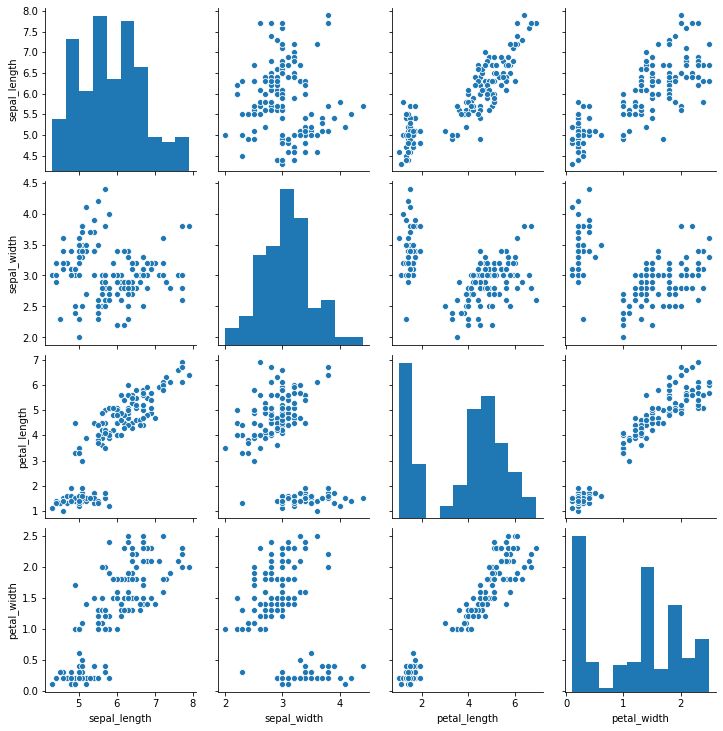

In [28]:
plt.figure()
sns.pairplot(dataset)
plt.show()

### Using KNN for classification

Making predictions

In [29]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
#Evaluating predictions by Building confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

### Calculating Model Accuracy

In [31]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy is equal to 96.67 %.


In [32]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

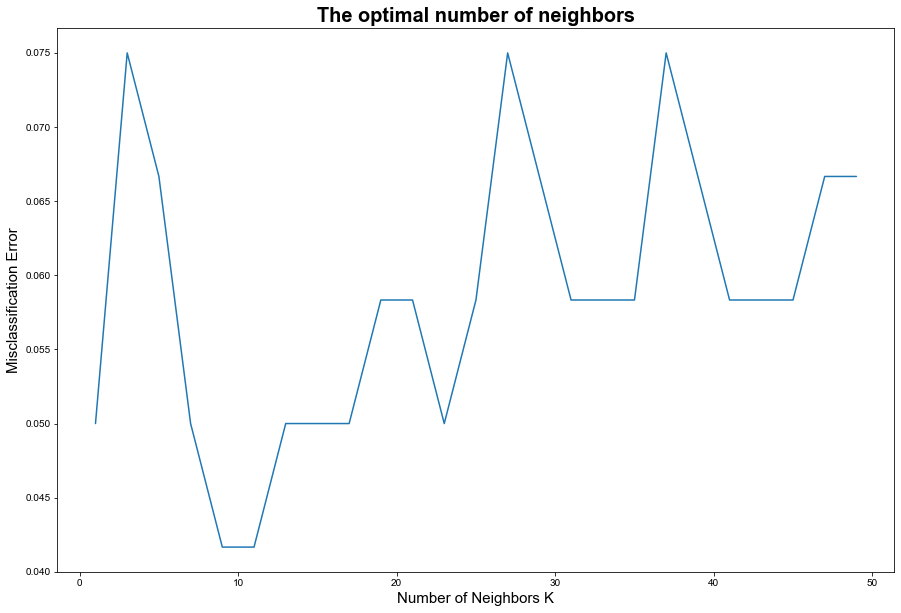

In [33]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [34]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


### Steps for how to use this model for prediction

- Importing Libraries
- Importing the Dataset
- split our dataset into its attributes and labels
- Train Test Split in other words divide our dataset into training and test splits
- scale the features
- use sklearn.neighbours for Training and Predictions
- use score metric to Evaluate the Algorithm

## References

https://en.wikipedia.org/wiki/Scikit-learn

Iris Image Credit
https://cdn.pixabay.com/photo/2017/06/11/16/13/iris-2392750_960_720.jpg

Iris Data Taken From

https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

https://rstudio-pubs-static.s3.amazonaws.com/369869_fe1a8a1a1b1c4145b5b6f22b96df8345.html


https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

https://medium.com/@vibrant_linen_snake_505/knn-classification-using-python-scikit-learn-iris-dataset-725afed12633

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

https://scikit-learn.org/stable/modules/neighbors.html#classification

https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# End of All Tasks
***